# Decision Trees

What are our learning objectives for this lesson?

* Learn how to apply Decision Trees in a classification problem
* Get familiar with the scikit-learn library

In this lab, we will once again construct a machine learning model that predict the species of an iris based on its pedal and sepal dimensions. This time, we will use another approach in the supervised learning toolbox–the decision tree, instead of using the support vector machine like the last lan we worked on. 

Beginning with the root node, every node that is not a leave node acts as a decision node in the tree. In its essence, a decision tree architecture is where we do a greedy search to find the optimal split point in a tree. The decision nodes are where the data is split, and the leave nodes represents outputs like a class label. 

Content used in this lesson is based upon information in the following sources:
* Géron, A. (2019). Hands-on machine learning with Scikit-Learn, Keras and TensorFlow: concepts, tools, and techniques to build intelligent systems (2nd ed.). O’Reilly.

## Lab Tasks 

1. Import the iris dataset
2. Read the documentation for Scikit-Learn's DecisionTreeClassifier and use it
3. Visualize the tree using Scikit-Learn

### Import the Iris Dataset

* Import the Iris dataset
* Split the dataset into train and test sets, use a 70:30 split ratio
    * You can reduce the dimension of the data by dropping features or by projecting the inputs to a lower dimension, you can also keep the data as it is.

Here are some import statements to get you started.

In [71]:
from sklearn.datasets import load_iris
import sklearn.tree as tree
import numpy as np

In [72]:
# TODO: import the iris datset here
iris = load_iris()

# TODO: Split the data into train and test set. 
#       Reduce the dimension if you wish, 
#       
test_size = 0.7
mask = np.random.rand(len(iris.data)) < test_size

X_train = iris.data[mask]
y_train = iris.target[mask]

X_test = iris.data[~mask]
y_test = iris.target[~mask]

### Select a Model

Visit the [documentation](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree) of ```sklearn.tree```, select a tree model that best fit the task we are training the model to perform. 

Once you have selected a model, we want to determine the depth of the tree. In Scikit-Learn, we can adjust the ```max_depth``` parameter to limit the depth the tree is allowed to grow. The deeper the tree, the more splits we make in the data, and the more complex the model will become. If the number of splits is too low, the model underfits the data and if it is too high the model overfits. 

Recall that the root node is considered to have a depth of 0. You can try different depths. For now, we can simply put in ```None``` (which is the default value for this optional parameter) for the parameter and see how many levels ends up in our tree.

What we want to do in the cell below:
* Set up the model of choice
* fit the train set to the model

In [73]:
# TODO: Set up the model of choice and fit the training data to it
tree_clf = tree.DecisionTreeClassifier(max_depth=None)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier()

### Test the Fitted Model

Visit the documentation of your particular Scikit-Learn tree model to find different built-in methods for testing your model. Try the different methods available.

In [74]:
# TODO: Try different built-in testing methods

accuracy = tree_clf.score(X_test, y_test)
print(f'accuracy: {accuracy}')

# Examples of built-in methods for predicting targets:
# tree_clf.predict(X_test)
# tree_clf.predict_proba(X_test)

accuracy: 0.8913043478260869


##### 💯 What is the accuracy of your model?

### Visualize the Tree

The decision tree model makes the internal decisions made by the model intuitive to interpret. One way to exmaple the internal decision process of a decision tree model is to print out the tree and see for ourselves what kind of decision is being made in each node. We will use a module in ```sklearn.tree``` called ```export_graphviz``` to visualize the tree.

In order to visualize the graph inside of this notebook (instead of save .dot and image files in our local directory outside of the notebook), we will install and import some modules. 

If you wish to save the .dot graph to a local directory and convert the .dot to an image file instead, note the following:
* pick the directory you would like to save the .dot to
    *  ```f = open("some/directory/on/your/machine/iris_tree.dot", 'w')```
* add  ```out_file=f``` to the parameters when you call the ```export_graphviz``` function
* you don't have to save the output of ```export_graphviz``` to a variable since the output is being saved to the specified directory
* run ```!dot -Tpng iris_tree.dot > iris_tree.png``` in the directory where the .dot is saved to obtain a png of the tree graph

In [75]:
# DELETE THIS CELL if you wish to save the image file locally

! pip install pydotplus
import pydotplus
from IPython.display import Image, display

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python3.9 -m pip install --upgrade pip


What we want to do here:
* Visit the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html) of ```export_graphviz``` to find out what parameters it takes
* Experiment with the ```max_depth```, print out the graphs with different depths, find the ```max_depth``` value that yields the highest performance. 

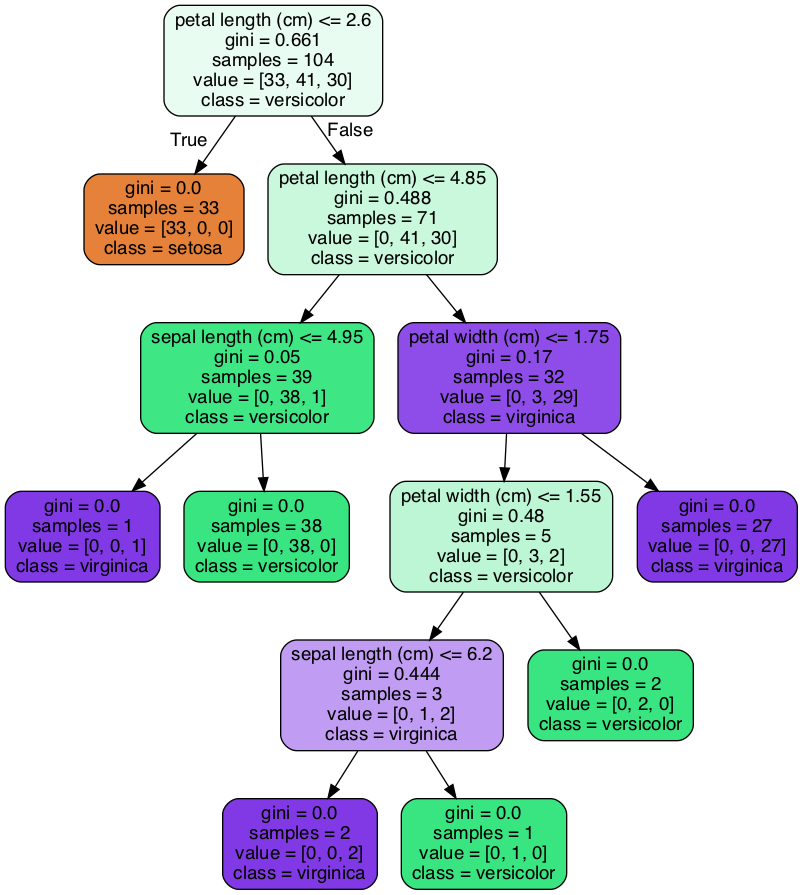

In [76]:
from sklearn.tree import export_graphviz

# TODO: fill in the parameters for this function
dot_data = export_graphviz(
 tree_clf,
 feature_names=iris.feature_names[:],
 class_names=iris.target_names,
 rounded=True,
 filled=True
 )

# DELETE THESE 2 LINES if you wish to save the image file locally
graph = pydotplus.graph_from_dot_data(dot_data)
display(Image(data=graph.create_png()))

##### What is the depth that seemed to work the best for your model? Is it deeper or shallower than the initial depth with the default setting? Do you have a hypothesis on why that might be?